In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
import plotly.express as px
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.figure_factory as ff
from sklearn.impute import SimpleImputer
%matplotlib inline


In [2]:
df1 = pd.read_csv(r"2012_nba_draft_combine.csv")
df2 = pd.read_csv(r"2013_nba_draft_combine.csv")
df3 = pd.read_csv(r"2014_nba_draft_combine.csv")
df4 = pd.read_csv(r"2015_nba_draft_combine.csv")
df5 = pd.read_csv(r"2016_nba_draft_combine.csv")

In [3]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True,axis=0)

In [4]:
df=df.iloc[:,1:]

In [5]:
df.head()

,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,Andre Drummond,2012,9.0,81.75,83.75,90.25,109.5,33.5,143.0,31.5,141.0,279.0,7.5,9.50,9.50,10.0,10.83,3.39
1,Andrew Nicholson,2012,19.0,80.50,81.50,88.00,107.0,30.5,137.5,28.5,135.5,234.0,7.6,10.00,10.75,10.0,11.89,3.67
2,Anthony Davis,2012,1.0,81.25,82.50,89.50,108.0,NaN,NaN,NaN,NaN,222.0,7.9,9.00,8.50,NaN,NaN,NaN
3,Arnett Moultrie,2012,27.0,81.50,82.75,86.25,106.5,37.5,144.0,33.5,140.0,233.0,7.7,9.25,9.25,10.0,11.32,3.22
4,Austin Rivers,2012,10.0,75.50,77.00,79.25,96.5,37.5,134.0,32.5,129.0,203.0,6.2,8.50,10.00,1.0,11.54,3.32


In [6]:
df.shape

(306, 18)

In [7]:
imputer_mean = SimpleImputer(missing_values = np.nan,strategy = 'mean')
imputer_mean = SimpleImputer(missing_values = np.nan,strategy = 'median')
imputer_mode = SimpleImputer(strategy='most_frequent')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    306 non-null    object 
 1   Year                      306 non-null    int64  
 2   Draft pick                215 non-null    float64
 3   Height (No Shoes)         306 non-null    float64
 4   Height (With Shoes)       306 non-null    float64
 5   Wingspan                  306 non-null    float64
 6   Standing reach            306 non-null    float64
 7   Vertical (Max)            257 non-null    float64
 8   Vertical (Max Reach)      257 non-null    float64
 9   Vertical (No Step)        258 non-null    float64
 10  Vertical (No Step Reach)  258 non-null    float64
 11  Weight                    305 non-null    float64
 12  Body Fat                  305 non-null    float64
 13  Hand (Length)             306 non-null    float64
 14  Hand (Widt

In [9]:
df.isnull().sum()

Player                        0
Year                          0
Draft pick                   91
Height (No Shoes)             0
Height (With Shoes)           0
Wingspan                      0
Standing reach                0
Vertical (Max)               49
Vertical (Max Reach)         49
Vertical (No Step)           48
Vertical (No Step Reach)     48
Weight                        1
Body Fat                      1
Hand (Length)                 0
Hand (Width)                  0
Bench                       157
Agility                      52
Sprint                       53
dtype: int64

In [10]:
df["Draft pick"].unique()

array([ 9., 19.,  1., 27., 10., 33.,  3.,  6., 55., 46.,  4., 42., 35.,
       nan, 22., 30.,  7., 34., 24., 21., 31., 12., 14., 23., 13., 47.,
       39., 44., 51., 49., 59., 29., 11.,  2., 43., 26., 15., 36., 28.,
       37., 38., 58., 16., 18.,  8.,  5., 32., 25., 17., 41., 40., 53.,
       50., 52., 56., 48., 20., 60., 45., 54.])

In [11]:
df["Draft pick"].describe(include="all")

count    215.000000
mean      29.000000
std       16.127413
min        1.000000
25%       15.000000
50%       29.000000
75%       42.000000
max       60.000000
Name: Draft pick, dtype: float64

In [12]:
df["Draft pick"].value_counts()

Draft pick
9.0     5
18.0    5
17.0    5
34.0    5
49.0    5
22.0    5
8.0     5
42.0    5
6.0     5
36.0    5
33.0    5
10.0    5
37.0    5
14.0    5
43.0    4
13.0    4
11.0    4
19.0    4
28.0    4
51.0    4
44.0    4
25.0    4
12.0    4
23.0    4
30.0    4
27.0    4
46.0    4
56.0    4
58.0    4
38.0    4
40.0    4
24.0    4
21.0    4
41.0    4
32.0    3
5.0     3
48.0    3
20.0    3
45.0    3
50.0    3
59.0    3
26.0    3
2.0     3
29.0    3
39.0    3
47.0    3
31.0    3
7.0     3
15.0    3
35.0    3
4.0     3
55.0    3
3.0     3
16.0    2
52.0    2
1.0     1
53.0    1
60.0    1
54.0    1
Name: count, dtype: int64

<Axes: xlabel='Draft pick', ylabel='count'>

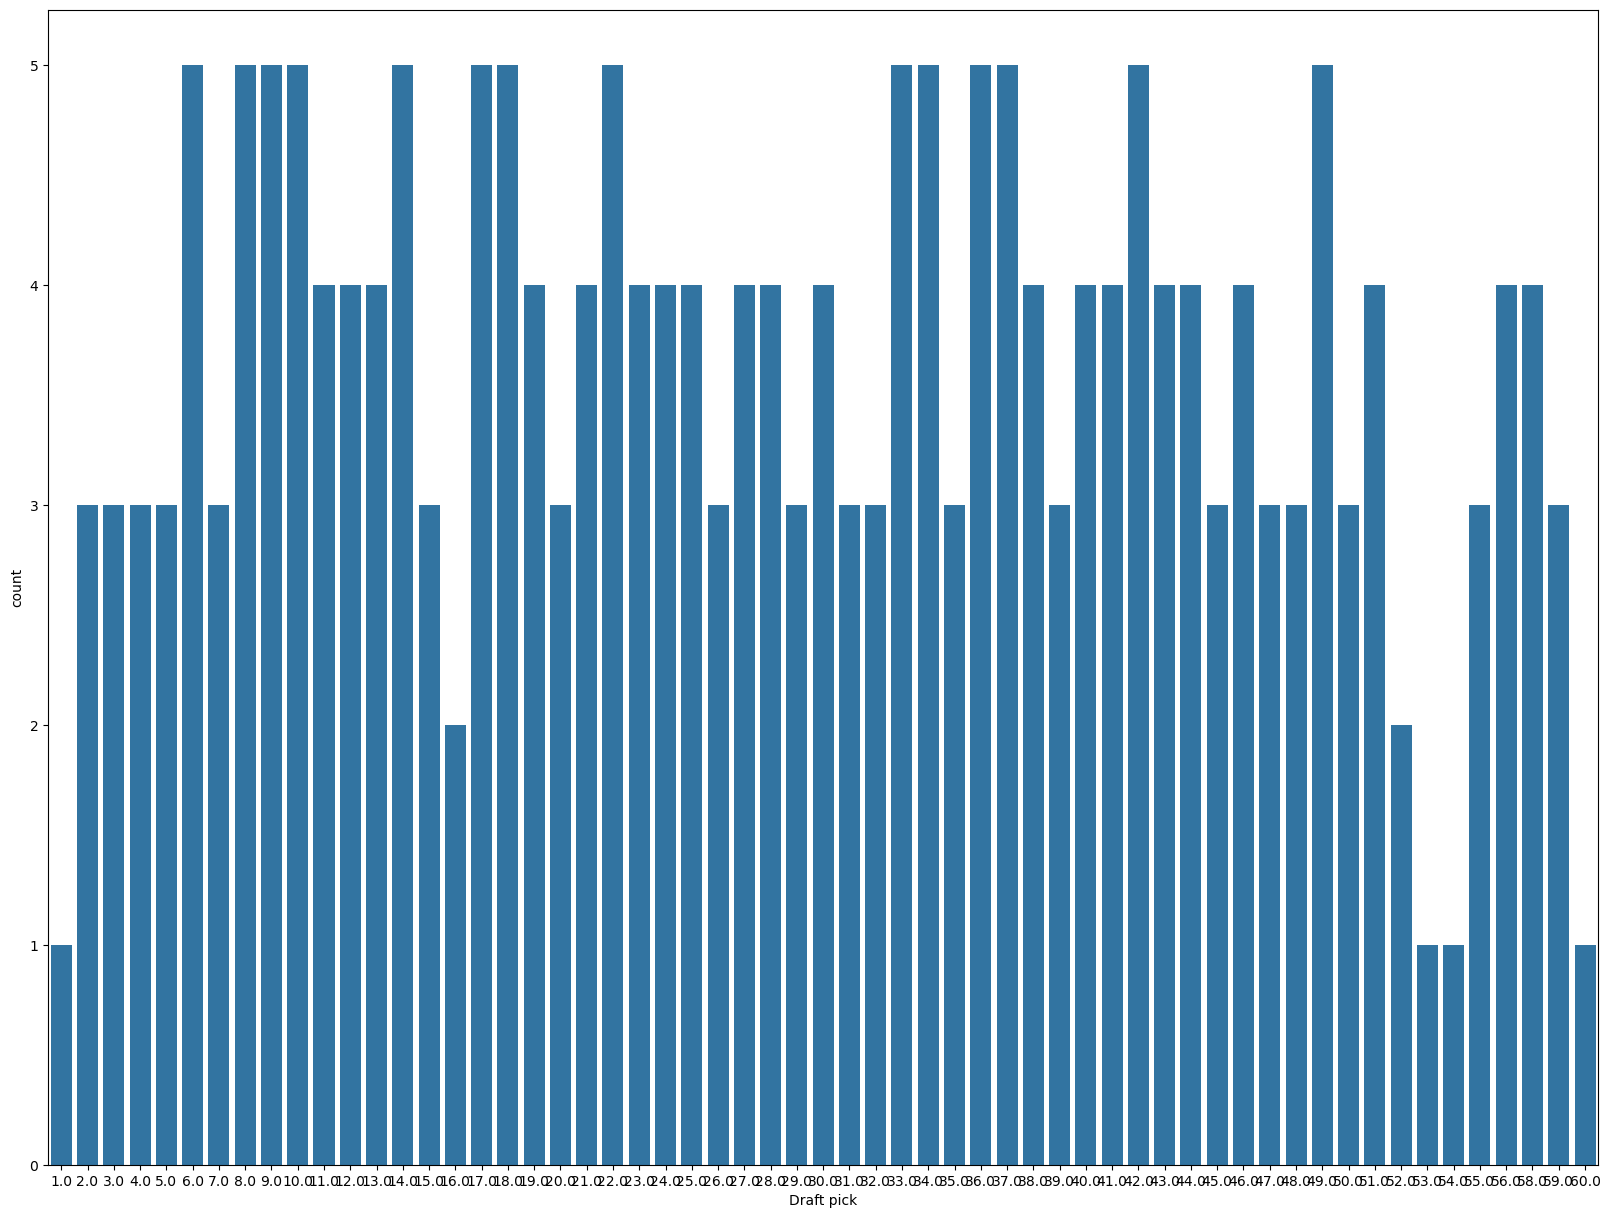

In [13]:
plt.figure(figsize=(20,15))
sns.countplot(x="Draft pick",data=df)

In [14]:
df["Draft pick"]=imputer_mean.fit_transform(np.array(df["Draft pick"]).reshape(-1,1))

In [15]:
df["Draft pick"].isnull().sum().any()

False

In [16]:
df["Draft pick"]=df["Draft pick"].astype(int)

In [17]:
df["Vertical (Max)"].unique()

array([33.5, 30.5,  nan, 37.5, 32.5, 39. , 39.5, 41.5, 37. , 33. , 34. ,
       31. , 29.5, 36.5, 34.5, 40. , 38. , 30. , 35. , 31.5, 40.5, 35.5,
       38.5, 36. , 42. , 32. , 29. , 41. , 44. , 43.5, 28.5, 25. , 43. ,
       28. ])

In [18]:
type(df["Vertical (Max)"][0])

numpy.float64

In [19]:
df["Vertical (Max)"].describe(include="all")

count    257.000000
mean      35.638132
std        3.595704
min       25.000000
25%       33.000000
50%       35.500000
75%       38.000000
max       44.000000
Name: Vertical (Max), dtype: float64

In [20]:
df["Vertical (Max)"].value_counts()

Vertical (Max)
35.5    22
36.5    16
34.5    15
37.5    15
36.0    13
38.0    12
37.0    12
34.0    12
32.5    11
31.0    10
33.5    10
39.5    10
35.0     9
40.5     9
31.5     8
38.5     8
32.0     8
29.5     7
33.0     6
40.0     6
41.5     6
29.0     4
44.0     3
28.5     3
43.0     3
43.5     3
30.0     3
41.0     3
30.5     3
39.0     3
42.0     2
25.0     1
28.0     1
Name: count, dtype: int64

<Axes: xlabel='Vertical (Max)', ylabel='count'>

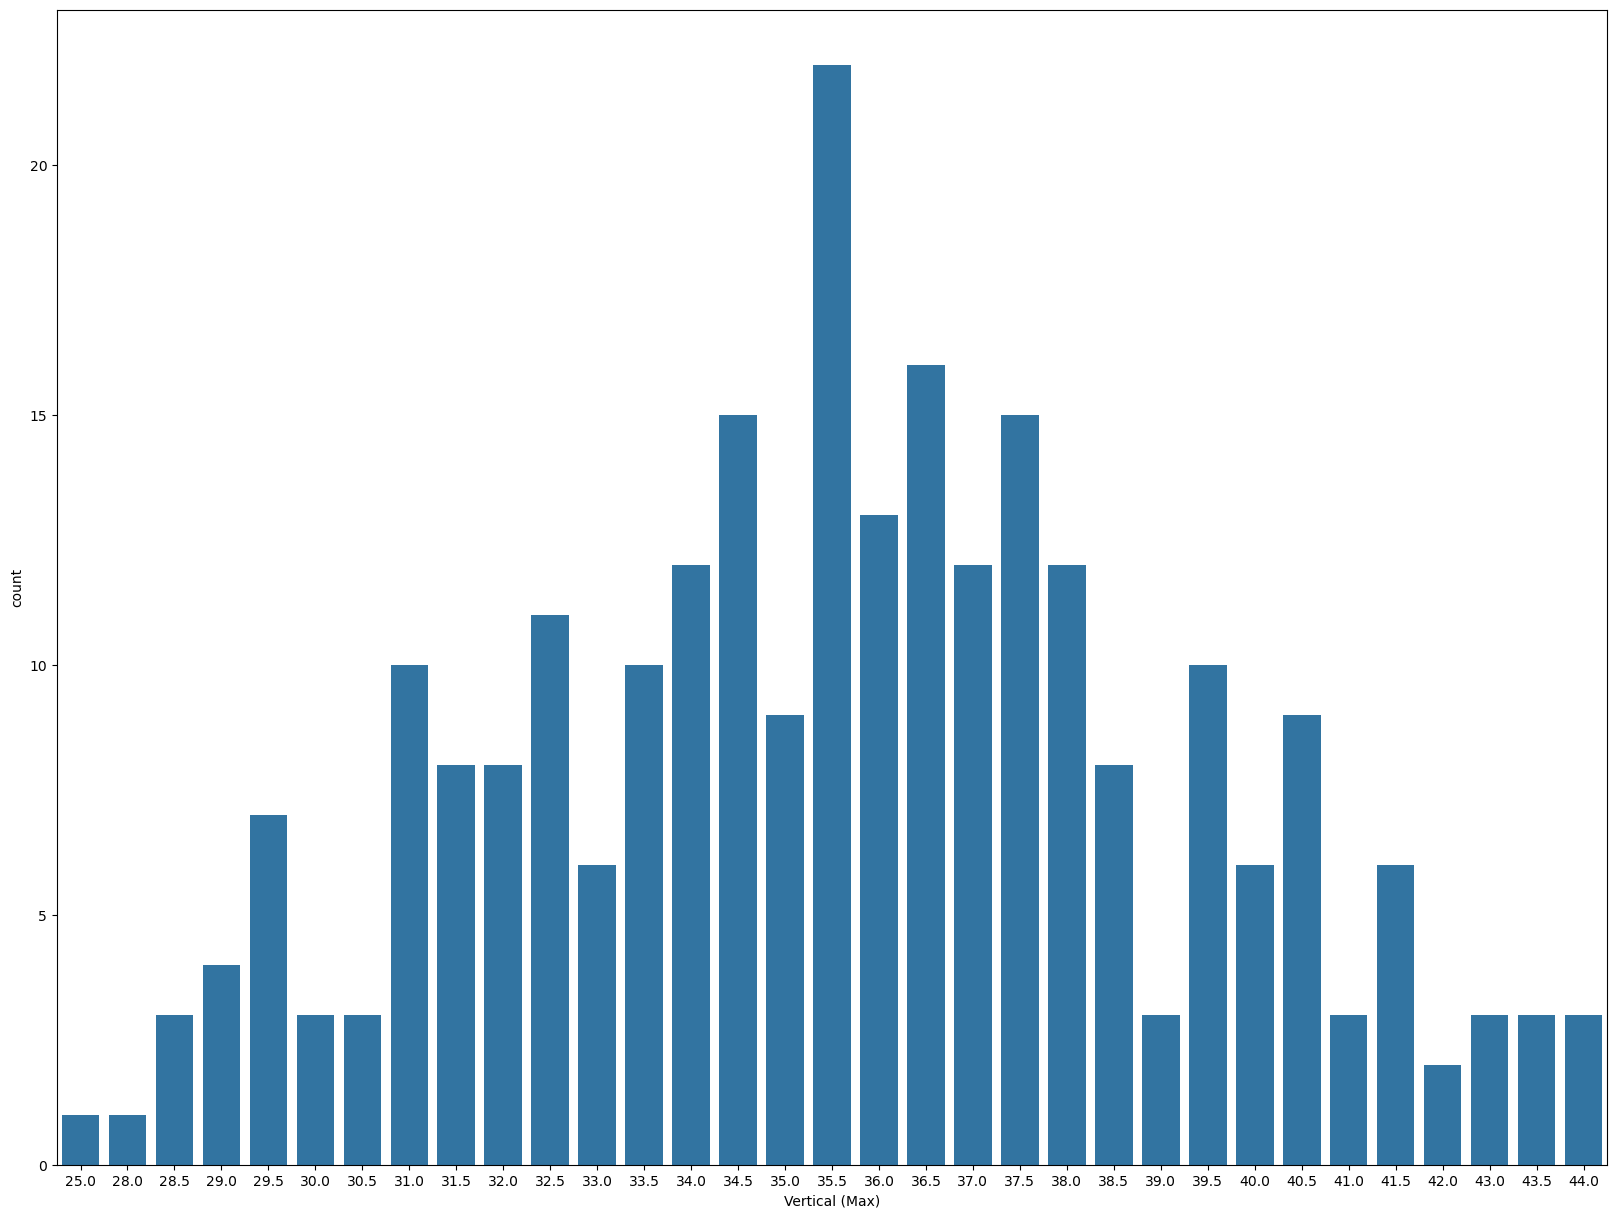

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(x="Vertical (Max)",data=df)

In [22]:
df["Vertical (Max)"]=imputer_mode.fit_transform(np.array(df["Vertical (Max)"]).reshape(-1,1))